In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#kmeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

df = pd.read_csv('C://Users//owner//Downloads//Mall_Customers.csv')
df.head()
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [34]:
df=df.drop(['CustomerID'],axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [35]:

#Mapping gender to numerical values
gender_mapping = {'Male': 0, 'Female': 1}
df['Genre'] = df['Genre'].map(gender_mapping)

df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [36]:
df=pd.get_dummies(df)

# PCA

In [37]:
import numpy as np

# Function to standardize data
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    standardized = (data - mean) / std_dev
    return standardized, mean, std_dev

# Function to calculate covariance matrix
def calculate_covariance_matrix(data):
    num_samples = data.shape[0]
    covariance_matrix = np.dot(data.T, data) / (num_samples - 1)
    return covariance_matrix

# Power Iteration method to find the dominant eigenvalue and eigenvector
def power_iteration(matrix, num_iterations):
    # Initialize a random vector of the same size as the matrix
    vector = np.random.rand(matrix.shape[1])

    for _ in range(num_iterations):
        # Multiply the matrix with the vector
        vector = np.dot(matrix, vector)
        
        # Normalize the vector
        vector /= np.linalg.norm(vector)
    
    # Calculate the eigenvalue
    eigenvalue = np.dot(np.dot(matrix, vector), vector) / np.dot(vector, vector)
    
    return eigenvalue, vector

# Function to perform PCA
def apply_pca(data, num_components):
    standardized_data, mean, std_dev = standardize_data(data)
    covariance_matrix = calculate_covariance_matrix(standardized_data)
    
    eigenvalues = []
    eigenvectors = []

    for _ in range(num_components):
        eigenvalue, eigenvector = power_iteration(covariance_matrix, num_iterations=1000)
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)
        
        # Deflate the covariance matrix to find the next largest eigenvalue
        covariance_matrix -= eigenvalue * np.outer(eigenvector, eigenvector)
    
    eigenvalues = np.array(eigenvalues)
    eigenvectors = np.array(eigenvectors).T

    # Select the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]

    # Project the data onto the new subspace
    transformed_data = np.dot(standardized_data, principal_components)

    # Reconstruct the data (optional)
    reconstructed_data = np.dot(transformed_data, principal_components.T) * std_dev + mean

    return transformed_data, reconstructed_data, eigenvalues, eigenvectors


In [38]:
#convert to numpy
data_array = df.values
print(data_array)


[[  0  19  15  39]
 [  0  21  15  81]
 [  1  20  16   6]
 [  1  23  16  77]
 [  1  31  17  40]
 [  1  22  17  76]
 [  1  35  18   6]
 [  1  23  18  94]
 [  0  64  19   3]
 [  1  30  19  72]
 [  0  67  19  14]
 [  1  35  19  99]
 [  1  58  20  15]
 [  1  24  20  77]
 [  0  37  20  13]
 [  0  22  20  79]
 [  1  35  21  35]
 [  0  20  21  66]
 [  0  52  23  29]
 [  1  35  23  98]
 [  0  35  24  35]
 [  0  25  24  73]
 [  1  46  25   5]
 [  0  31  25  73]
 [  1  54  28  14]
 [  0  29  28  82]
 [  1  45  28  32]
 [  0  35  28  61]
 [  1  40  29  31]
 [  1  23  29  87]
 [  0  60  30   4]
 [  1  21  30  73]
 [  0  53  33   4]
 [  0  18  33  92]
 [  1  49  33  14]
 [  1  21  33  81]
 [  1  42  34  17]
 [  1  30  34  73]
 [  1  36  37  26]
 [  1  20  37  75]
 [  1  65  38  35]
 [  0  24  38  92]
 [  0  48  39  36]
 [  1  31  39  61]
 [  1  49  39  28]
 [  1  24  39  65]
 [  1  50  40  55]
 [  1  27  40  47]
 [  1  29  40  42]
 [  1  31  40  42]
 [  1  49  42  52]
 [  0  33  42  60]
 [  1  31  4

In [47]:
# Applying PCA
num_components = 4 # Number of principal components
transformed, reconstructed, eigenvalues, eigenvectors = apply_pca(data_array, num_components)

print(transformed.shape)

(200, 4)


In [48]:
# View the first few rows of the original data
print("Original data - First few rows:")
print(df.head())

# View the last few rows of the original data
print("\nOriginal data - Last few rows:")
print(df.tail())

# View the first few rows of the transformed data after PCA
print("\nTransformed data after PCA - First few rows:")
print(pd.DataFrame(transformed).head())

# View the last few rows of the transformed data after PCA
print("\nTransformed data after PCA - Last few rows:")
print(pd.DataFrame(transformed).tail())

Original data - First few rows:
   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      0   19                  15                      39
1      0   21                  15                      81
2      1   20                  16                       6
3      1   23                  16                      77
4      1   31                  17                      40

Original data - Last few rows:
     Genre  Age  Annual Income (k$)  Spending Score (1-100)
195      1   35                 120                      79
196      1   45                 126                      28
197      0   32                 126                      74
198      0   32                 137                      18
199      0   30                 137                      83

Transformed data after PCA - First few rows:
          0         1         2         3
0  0.406383 -0.520714 -2.072527 -1.335529
1  1.427673 -0.367310 -2.277644 -0.082329
2 -0.050761 -1.894068 -0.367375 -2.174381
3  1.694513 -1

In [49]:
# View the first few rows of the transformed data after PCA
print("\nTransformed data after PCA - First few rows:")
print(pd.DataFrame(reconstructed).head())

# View the last few rows of the transformed data after PCA
print("\nTransformed data after PCA - Last few rows:")
print(pd.DataFrame(reconstructed).tail())


Transformed data after PCA - First few rows:
     0     1     2     3
0  0.0  19.0  15.0  39.0
1  0.0  21.0  15.0  81.0
2  1.0  20.0  16.0   6.0
3  1.0  23.0  16.0  77.0
4  1.0  31.0  17.0  40.0

Transformed data after PCA - Last few rows:
                0     1      2     3
195  1.000000e+00  35.0  120.0  79.0
196  1.000000e+00  45.0  126.0  28.0
197  2.220446e-16  32.0  126.0  74.0
198  4.440892e-16  32.0  137.0  18.0
199  4.440892e-16  30.0  137.0  83.0


In [50]:
from sklearn.cluster import DBSCAN

# Create an instance of DBSCAN
db= DBSCAN(eps=0.5, min_samples=5)


C:\Users\owner\AppData\Local\Temp\ipykernel_24048\3065192047.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_array[:, 0], data_array[:, 1], s=50, cmap='blue')


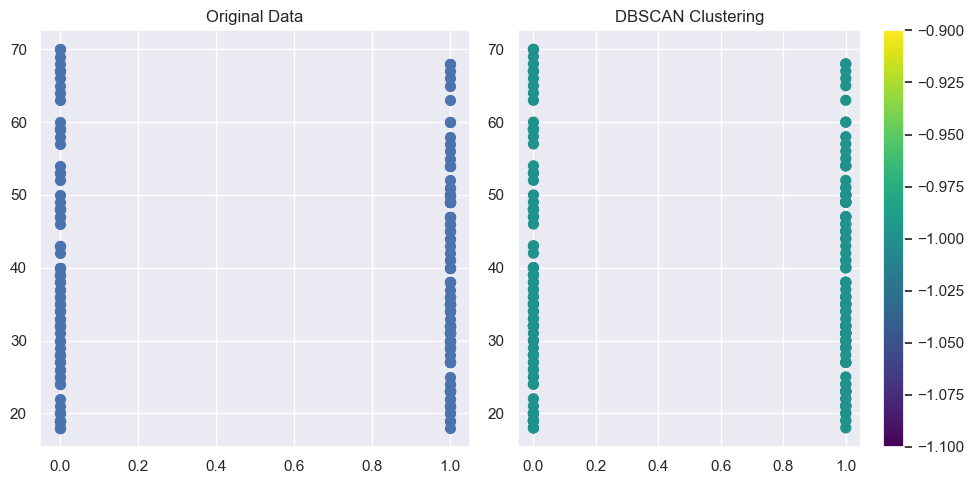

In [51]:
# Plot original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.scatter(data_array[:, 0], data_array[:, 1], s=50, cmap='blue')

# Apply DBSCAN
labels = db.fit_predict(data_array)

# Plot data after DBSCAN
plt.subplot(1, 2, 2)
plt.title("DBSCAN Clustering")
plt.scatter(data_array[:, 0], data_array[:, 1], s=50, c=labels, cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()

C:\Users\owner\AppData\Local\Temp\ipykernel_24048\1715883019.py:67: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reconstructed[:, 0], reconstructed[:, 1], s=50, cmap='blue')


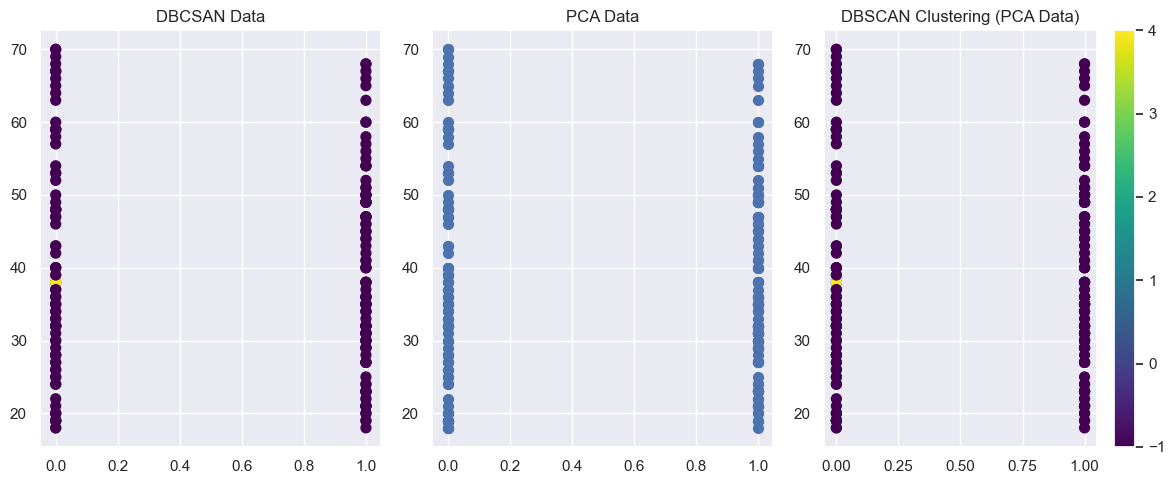

In [52]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def range_query(data, point_index, epsilon):
    neighbors = []
    for i, datapoint in enumerate(data):
        if euclidean_distance(data[point_index], datapoint) <= epsilon:
            neighbors.append(i)
    return neighbors

def dbscan(data, epsilon, min_points):
    labels = [0] * len(data)  # 0 represents unvisited points, positive integers represent cluster labels
    cluster_id = 0

    for i in range(len(data)):
        if labels[i] != 0:
            continue

        neighbors = range_query(data, i, epsilon)

        if len(neighbors) < min_points:
            labels[i] = -1  # Mark point as noise
        else:
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_points)

    return labels

def expand_cluster(data, labels, point_index, neighbors, cluster_id, epsilon, min_points):
    labels[point_index] = cluster_id

    i = 0
    while i < len(neighbors):
        current_point = neighbors[i]

        if labels[current_point] == 0:
            labels[current_point] = cluster_id
            current_neighbors = range_query(data, current_point, epsilon)

            if len(current_neighbors) >= min_points:
                neighbors.extend(current_neighbors)

        elif labels[current_point] == -1:
            labels[current_point] = cluster_id

        i += 1

# Example usage:
data = data_array
epsilon = 2.0
min_points = 2

# Original data plot
plt.figure(figsize=(12, 5))

# Plot original data
cluster_labels = dbscan(data, epsilon, min_points)
plt.subplot(1, 3, 1)
plt.title("DBCSAN Data")
plt.scatter(data[:, 0], data[:, 1], s=50, c=cluster_labels, cmap='viridis')

# Plot PCA-reduced data
plt.subplot(1, 3, 2)
plt.title("PCA Data")
plt.scatter(reconstructed[:, 0], reconstructed[:, 1], s=50, cmap='blue')

# Apply DBSCAN on original data
cluster_labels2 = dbscan(reconstructed, epsilon, min_points)

# Plot data after DBSCAN on original data
plt.subplot(1, 3, 3)
plt.title("DBSCAN Clustering (PCA Data)")
plt.scatter(reconstructed[:, 0], reconstructed[:, 1], s=50, c=cluster_labels2, cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()

In [53]:
data.shape


(200, 4)

C:\Users\owner\AppData\Local\Temp\ipykernel_24048\541675246.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reconstructed[:, 0], reconstructed[:, 1], s=50, cmap='blue')


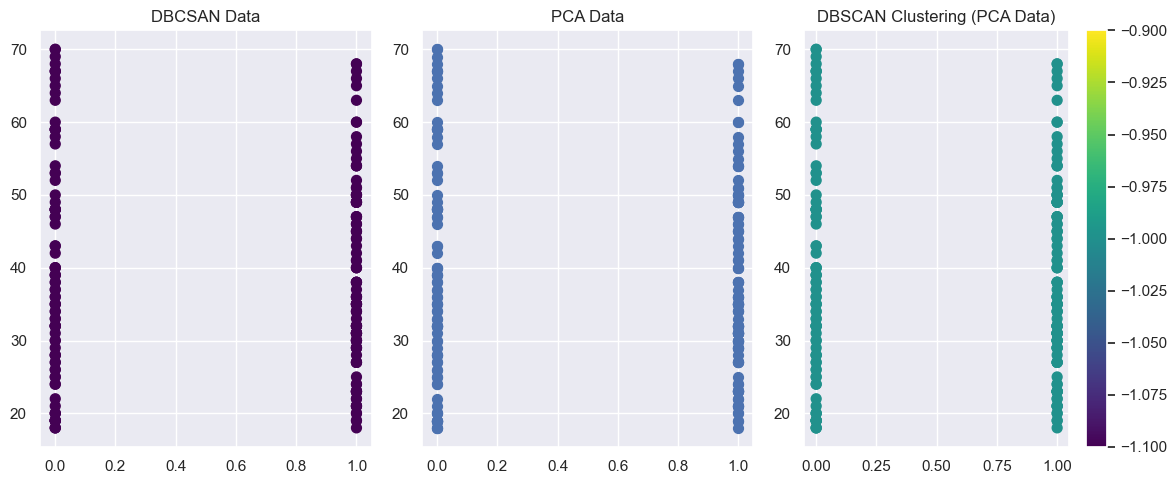

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Original data plot
plt.figure(figsize=(12, 5))
from sklearn.cluster import DBSCAN

# Create a DBSCAN instance with epsilon (eps) and min_samples parameters
epsilon = 0.5  # Adjust this value based on your dataset
min_samples = 5  # Adjust this value based on your dataset
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit DBSCAN to your data and obtain the cluster labels
cluster_labels2 = dbscan.fit_predict(data)
plt.subplot(1, 3, 1)
plt.title("DBCSAN Data")
plt.scatter(data[:, 0], data[:, 1], s=50, c=cluster_labels2, cmap='viridis')

# Plot PCA-reduced data
plt.subplot(1, 3, 2)
plt.title("PCA Data")
plt.scatter(reconstructed[:, 0], reconstructed[:, 1], s=50, cmap='blue')

# Apply DBSCAN on original data
cluster_labels2=dbscan.fit_predict(reconstructed)
# Plot data after DBSCAN on original data
plt.subplot(1, 3, 3)
plt.title("DBSCAN Clustering (PCA Data)")
plt.scatter(reconstructed[:, 0], reconstructed[:, 1], s=50, c=cluster_labels2, cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()


1.2753647805658208
